In [229]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Univariate Linear Regression 

First we load the data.

In [230]:
data = pd.read_csv('ex1data1.txt', names = ["population", "profit"]) # load data

Now we extract the feature and target variables for regression.

In [231]:
X = data.drop('profit', axis=1) # extract feature variable
y = data['profit'] # extract target variable
m = len(y) # how many data-sets 

Lets take a look at the data.

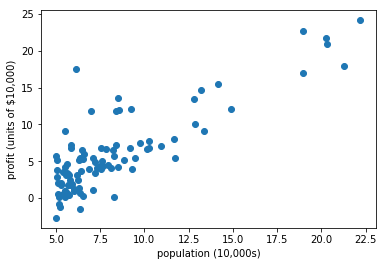

In [232]:
plt.scatter(X, y)
plt.xlabel('population (10,000s)')
plt.ylabel('profit (units of $10,000)')

Lets try using regression to fit a straight line to this data.

In [233]:
# could normalise this but not nessesary for 1 feature variable
# sigma = np.sqrt(X.var())
# mean = X.mean()
# X_norm = (X-mean)/sigma
# X_norm = np.insert(X_norm, 0, np.ones(m), axis=1) # insert column of 1s

We turn the dataframes in to matricies and add a column of ones for the $\theta_0$ intercept parameter.

In [234]:
X = X.as_matrix()
X = np.insert(X, 0, np.ones(m), axis=1) # insert column of 1s
y = y.as_matrix()

We now define our cost function to evaluate the quality of the fit. We use the sum of square residuals function for this.

In [235]:
def eval_cost_func(theta, X, y):
    """
    Calculates our sum of square residuals cost function
    """
    y_pred = np.sum(theta*X, axis=1) # theta vector multipied by X matrix and summed 
    # along the rows to calculate predicted y
    J = np.sum((y_pred - y)**2)/(2*m)
    return J

We can plot the contour plot of this cost function to get an idea where the minima is.

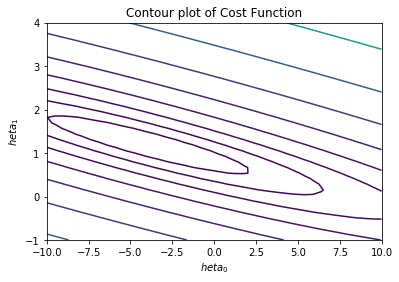

In [236]:
N = 40
theta0 = np.linspace(-10, 10, N)
theta1 = np.linspace(-1, 4, N)
J = np.zeros([N, N])
for i, t0 in enumerate(theta0):
    for j, t1 in enumerate(theta1):
        theta = np.array([t0, t1])
        J[j, i] = eval_cost_func(theta, X, y)

T0, T1 = np.meshgrid(theta0, theta1)

plt.figure()
CS = plt.contour(T0, T1, J, np.logspace(-2, 3, 20))
plt.title('Contour plot of Cost Function')
plt.xlabel('$\theta_0$')
plt.ylabel('$\theta_1$')

We will now implement gradient descent to find the minima of this cost function.

In [237]:
def gradient_descent(theta, X, y, alpha=0.008):
    m = len(y)
    y_pred = np.matmul(X, theta)
    resids = (y_pred-y)
    theta = theta - (alpha/m)*np.sum(resids*X.transpose(), axis=1)
    return theta

In [238]:
theta = np.array([0, 0]) # initialise theta to [0, 0]

J_hist = []
theta_hist = []
J_hist.append(eval_cost_func(theta, X, y))
theta_hist.append(theta)

N_iters = 3000

for iter in range(0, N_iters):
    theta = gradient_descent(theta, X, y)
    theta_hist.append(theta)
    J_hist.append(eval_cost_func(theta, X, y))

theta_hist = np.array(theta_hist)
J_hist = np.array(J_hist)

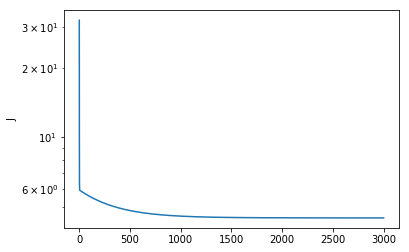

In [239]:
plt.semilogy(J_hist)
plt.ylabel('J')

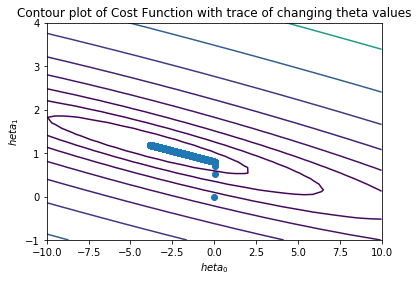

In [240]:
plt.figure()
CS = plt.contour(T0, T1, J, np.logspace(-2, 3, 20))
plt.title('Contour plot of Cost Function with trace of changing theta values')
plt.scatter(theta_hist[:, 0], theta_hist[:, 1])
plt.xlabel('$\theta_0$')
plt.ylabel('$\theta_1$')

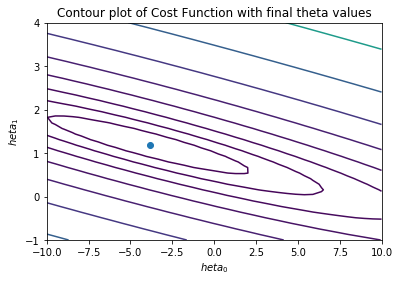

In [241]:
plt.figure()
CS = plt.contour(T0, T1, J, np.logspace(-2, 3, 20))
plt.title('Contour plot of Cost Function with final theta values')
plt.scatter(theta[0], theta[1])
plt.xlabel('$\theta_0$')
plt.ylabel('$\theta_1$')

# Multivariate Linear Regression 

In [359]:
data = pd.read_csv('ex1data2.txt', names = ["house_size", "no_bedrooms", "price"]) # load data

In [360]:
X = data.drop('price', axis=1) # extract feature variable
y = data['price'] # extract target variable
m = len(y) # how many data-sets 

In [361]:
X = (X.as_matrix()).astype(float)
y = (y.as_matrix()).astype(float)

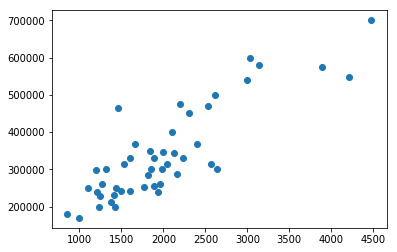

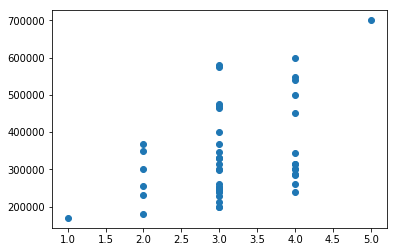

In [362]:
plt.scatter(X[:, 0], y)
plt.show()
plt.scatter(X[:, 1], y)

## Linear Regression with Gradient Descent

We now normalise the features such that they are all on the same relative scale

In [363]:
def normalise_data(X):
    mu = np.mean(X, axis=0)
    sigma = np.var(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma
    
X_norm, mu, sigma = normalise_data(X)
X_norm = np.insert(X_norm, 0, np.ones(m), axis=1) # insert column of 1s

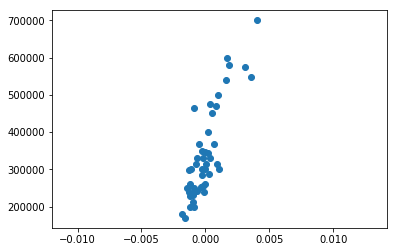

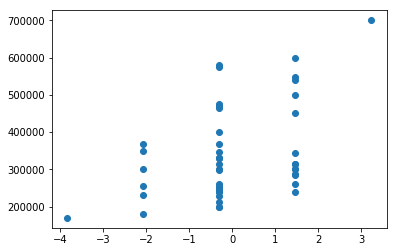

In [364]:
plt.scatter(X_norm[:, 1], y)
plt.show()
plt.scatter(X_norm[:, 2], y)

In [365]:
def eval_cost_func(theta, X, y):
    """
    Calculates our sum of square residuals cost function
    """
    #y_pred = np.sum(theta*X, axis=1) # theta vector multipied by X matrix and summed 
    # along the rows to calculate predicted y
    m = len(y)
    y_pred = np.matmul(X, theta) # above is equivalent to matrix multiplication of X and theta
    J = np.dot((y_pred - y), (y_pred - y))/(2*m)
    return J

In [366]:
def gradient_descent(theta, X, y, alpha=0.008):
    m = len(y)
    y_pred = np.matmul(X, theta)
    resids = (y_pred-y)
    theta_new = theta - (alpha/m)*np.matmul(resids, X_norm)
    return theta_new

In [367]:
theta = np.array([0, 0, 0]) # initialise theta to [0, 0]

J_hist = []
theta_hist = []
J_hist.append(eval_cost_func(theta, X_norm, y))
theta_hist.append(theta)

N_iters = 100000

for iter in range(0, N_iters):
    theta = gradient_descent(theta, X_norm, y, alpha = 0.001)
    theta_hist.append(theta)
    J_hist.append(eval_cost_func(theta, X_norm, y))

theta_hist = np.array(theta_hist)
J_hist = np.array(J_hist)

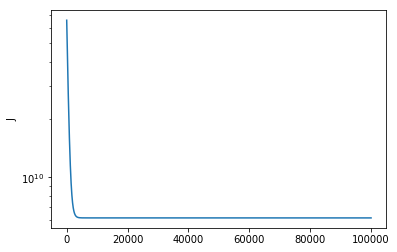

In [368]:
plt.semilogy(J_hist)
plt.ylabel('J')

In [369]:
theta

array([ 340412.65957444,    9577.48105677,   41182.0365775 ])

In [370]:
y_pred = np.matmul(X_norm, theta)

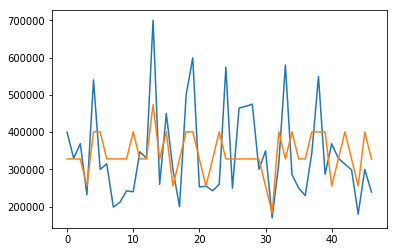

In [371]:
plt.plot(y)
plt.plot(y_pred)

Now we have found our $\vec{\theta}$ lets use it to predict the price of a new house with 1650 sq ft and 3 bedrooms

In [372]:
x_new = np.array([1650, 3])

In [373]:
x_new_norm = (x_new - mu)/sigma
x_new_norm = np.insert(x_new_norm, 0, np.ones(1), axis=0) # insert a 1

In [374]:
x_new_norm

array([  1.00000000e+00,  -5.67339576e-04,  -3.00319489e-01])

In [375]:
price = sum(theta*x_new_norm)

In [376]:
print("Predicted price = ${:.2f}".format(price))

Predicted price = $328039.46


## Normal Equation 

Now we use the normal equation to directly solve for $\vec{\theta}$

In [323]:
X = np.insert(X, 0, np.ones(m), axis=1) # insert column of 1s

In [324]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y)

In [325]:
theta

array([ 89597.9095428 ,    139.21067402,  -8738.01911233])

In [326]:
price = sum(theta*x_new_norm)

In [327]:
print("Predicted price = ${:.2f}".format(price))

Predicted price = $92222.03


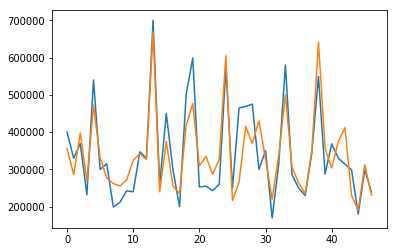

In [328]:
y_pred = np.matmul(X, theta)
plt.plot(y)
plt.plot(y_pred)

## Using Scikit learns linear regression model

In [329]:
from sklearn import linear_model

In [330]:
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

X = data.drop('price', axis=1) # extract feature variable
y = data['price'] # extract target variable
# Train the model using the training sets
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [331]:
regr.intercept_

89597.909542797541

In [332]:
regr.coef_

array([  139.21067402, -8738.01911233])

In [333]:
price = regr.predict([x_new])[0]

In [334]:
print("Predicted price = ${:.2f}".format(price))

Predicted price = $293081.46


In [335]:
y_pred = regr.predict(X)

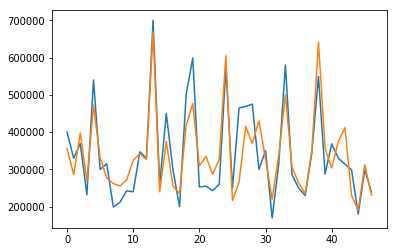

In [336]:
plt.plot(y)
plt.plot(y_pred)